# Explore ROV deployment using BGP2GO and BGPStream

Link: https://cseweb.ucsd.edu/classes/wi23/cse291-e/projects/cse291wi23_pa7.pdf

# 1. General Questions:

 * `What is a BGP collector`?
 
    A BGP collector is a system that collects BGP updates from multiple Autonomous Systems (ASes) and stores them in a database for analysis. BGP collectors are typically operated by research organizations, network operators, or other entities that need to analyze BGP routing data for various purposes, such as monitoring network performance, detecting routing anomalies, or studying Internet topology. BGP collectors can be public or private, and they typically use peering relationships with ASes to obtain BGP updates.
* `How does a BGP collector obtain BGP updates`?

    A BGP collector obtains BGP updates through peering relationships with ASes. Peering is a process by which two ASes agree to exchange BGP updates with each other. BGP collectors typically establish peering relationships with multiple ASes to obtain a diverse set of BGP updates. The peering relationships can be bilateral or multilateral, and they can be established through various means, such as direct connections, Internet Exchange Points (IXPs), or Route Servers. Once a BGP collector has established peering relationships with ASes, it can receive BGP updates from them and store them in a database for analysis.
* `What information is included in a BGP update`?

    A BGP update **typically** includes the following information (*details in 5th section*): 
    
    - Prefix: The IP address range being advertised or withdrawn 
    - AS path: The sequence of ASes that the update has traversed, starting from the origin AS and ending at the peering point with the collector 
    - Next hop: The IP address of the next hop router that should be used to reach the advertised prefix 
    - Origin: The origin of the update, which can be either an AS or an External BGP (EBGP) peer
    - Local preference: A value used by the AS to indicate its preference for a particular route 
    - MED (Multi-Exit Discriminator): A value used by the AS to indicate the preferred exit point for a particular route 
    - Community: A tag used by the AS to group routes and apply policies to them. BGP updates can also include other optional attributes, such as Aggregator, Atomic Aggregate, and Originator ID.
* `How is BGP data stored and analyzed`?

    BGP data is typically stored in a database for analysis. The database can be a relational database, a NoSQL database


# 2. BGP routing data

MRT files are used to store BGP routing information collected by BGP collectors. There are two types of MRT files: `RIB` and `update` files.

A **`RIB (Routing Information Base)`** file is a snapshot of the routing table of a BGP collector at a particular point in time. It contains the complete routing table of the collector, including all the prefixes and their associated attributes. RIB files are useful for studying the overall structure of the Internet routing system and for analyzing the evolution of the routing table over time.

An **`update`** file, on the other hand, contains the changes (announcements and withdrawals) to the routing table that occurred between two consecutive RIB snapshots. Update files are useful for studying the dynamics of the routing system, such as the propagation of routing information and the detection of routing anomalies like BGP hijacks.

`Question 2.1`:
 
URL structure for MRT update files. According to the text, the URL format for MRT update files is as follows: 

http://routeviews.org/route-views3/bgpdata/YYYY.MM/UPDATES/updates.YYYYMMDD.HHMM.bz2 

In this format, the variable elements that can be changed to point to other files are: 
- YYYY: Represents the year (e.g., 2023) 
- MM: Represents the month (e.g., 01 for January) 
- YYYYMMDD: 

Represents the date in the format YYYYMMDD (e.g., 20230102 for January 2, 2023) 

- HHMM: Represents the time in the format HHMM (e.g., 0230 for 02:30 AM) By modifying these variable elements in the URL, you can point to other MRT update files.


`Question 2.2`: 

The two popular route collector projects: Routeviews and RIPE RIS. According to the text, both Routeviews and RIPE RIS operate multiple collectors. However, the exact number of collectors is not mentioned in the given texts. Therefore, the source does not contain the information about the number of collectors each project operates.

`Question 2.3`:

The RIPE RIS website provides detailed information about the data collection process, including the dump intervals for RIBs and updates. According to the website, RIBs are dumped every two hours, while updates are dumped every 15 minutes.

`Question 2.4`:

 Based on the information available on the RIPE RIS website, we can discuss the pros and cons of the chosen intervals for RIBs and updates. 
 
 `Updates`:
 * Pros: 
    - Visibility (user-side): The chosen intervals for updates (15 minutes) provide users with more up-to-date information about changes in the routing table, which can be useful for real-time analysis and monitoring. 
    - Granularity: The chosen intervals for updates (15 minutes) provide a more granular view of changes in the routing table, which can help in identifying specific events or anomalies. 
 
 * Cons: 
    - Disk space (provider-side): The chosen intervals for updates (15 minutes) can result in a large amount of data being generated and stored, which can increase the storage requirements for the provider. 
    - Processing time: The chosen intervals for updates (15 minutes) can result in more frequent processing and analysis of the data, which can increase the processing time and resource requirements for the provider. 
    - Accuracy: The chosen intervals for updates (15 minutes) may not capture all changes in the routing table, as some changes may occur between the dump intervals. This can result in some changes being missed or delayed in the data. Overall, the chosen intervals for updates (15 minutes) provide a more granular view of changes in the routing table, but can also result in increased storage and processing requirements for the provider. The choice of intervals should be based on the specific needs and requirements of the users and providers, and may vary depending on the context and use case.

`RIBs`:
* Pros:
   - RIBs are less frequent than updates, meaning that they require less storage space and processing time.
   - RIBs can be used to validate the accuracy of updates, as any changes in the routing table should be reflected in subsequent RIBs.

* Cons:
   - RIBs do not provide information on the changes that occurred between snapshots, which means that they may not be sufficient for detecting routing anomalies that occur between RIB dumps.
   - RIBs may not be frequent enough to capture all changes in the routing table, which means that some changes may be missed.
   - RIBs may not be available for all collectors or for all time periods, which means that some data may be missing or incomplete.



# 3. Parsing single MRT files

**Annotated HTML version of bgpreader’s output of MRT**:

file: http://nids.caida.org:45000/cgi-bin/bgpreader.sh?http://routeviews.org/route-views3/bgpdata/2023.01/UPDATES/updates.20230102.0230.bz2,100,1299

**Question 3.1**: How much time elapsed from line 80 to line 120?

In [2]:
timestamp80 = 1672626601.368799
timestamp120 = 1672626601.524185

To calculate the time elapsed, we subtract the timestamp of line 80 from the timestamp of line 120:

1672626601.524185 - 1672626601.368799 = 0.155386 seconds

In [3]:
import datetime

datetime80 = datetime.datetime.fromtimestamp(timestamp80)
datetime120 = datetime.datetime.fromtimestamp(timestamp120)

time_str80 = datetime80.strftime("%Y-%m-%d %H:%M:%S")
time_str120 = datetime120.strftime("%Y-%m-%d %H:%M:%S")

print(time_str80)
print(time_str120)

2023-01-02 11:30:01
2023-01-02 11:30:01


Based on the provided table - http://nids.caida.org:45000/cgi-bin/bgpreader.sh?http://routeviews.org/route-views3/bgpdata/2023.01/UPDATES/updates.20230102.0230.bz2,100,1299 , 

we can see that AS 1299 appears in the AS path of some updates. However, we cannot determine from the table alone whether AS 1299 sends updates directly to a collector, as we do not know the entire AS path of the updates. Therefore, we cannot answer the question definitively based on the provided information.

# 4. Data exploration using BGP2GO

https://ris.ripe.net/docs/30_routing_beacons.html#current-beaconing-setup

`What is RPKI routing beacon?` 

It is a special prefix injected into the routing system to study their propagation behavior.

`What is ROA validity?` 
ROA validity refers to the status of a Route Origin Authorization (ROA) in the Resource Public Key Infrastructure (RPKI) system.

An ROA is a digitally signed object that specifies the prefix and the Autonomous System (AS) number that is authorized to originate the prefix. The ROA validity indicates whether the prefix origin AS in a BGP update message matches the authorized AS in the corresponding ROA. If the prefix origin AS matches the authorized AS in the ROA, the ROA is considered valid. If the prefix origin AS does not match the authorized AS in the ROA, the ROA is considered invalid. 


**RIPE RIS from the same location with a different ROA validity state:**

* 93.175.146.0/24, is announced by AS12654 and is the valid origin as per ROA(Route Origin Authorization)
* 93.175.147.0/24, is announced by AS196615 and is the invalid origin as per ROA
* 93.175.148.0/24, is announced by AS12654 and has no ROA


In the context of BGP routing, the occurrence pattern can be analyzed by observing the patterns of BGP updates, such as route announcements and withdrawals, for a particular prefix, AS (Autonomous System), etc. By examining the occurrence pattern, we can gain insights into the behavior and dynamics of BGP routing.

`What are announcements and withdrawals?`

An announcement is a message sent by a BGP router to its neighbors to advertise the availability of a particular network prefix. The announcement includes information about the prefix, such as its **IP address** and **the AS that originated the prefix**. When a BGP router receives an announcement, it updates its routing table to include the advertised prefix.

A withdrawal, on the other hand, is a message sent by a BGP router to its neighbors to indicate that a previously advertised prefix is **no longer available**. When a BGP router receives a withdrawal message, it removes the corresponding **prefix** from its routing table.

Announcements and withdrawals are used by BGP routers to exchange routing information and to build a global view of the Internet routing system. The propagation of announcements and withdrawals between BGP routers can be used to detect routing anomalies like BGP hijacks and to study the dynamics of the Internet routing system.

`How analyzing the forwarding behavior of collector peers regarding ROA-invalid prefixes can help us find anomalies`?

Analyzing the forwarding behavior of collector peers regarding ROA-invalid prefixes can help us find anomalies in the BGP routing system. This is because ROA-invalid prefixes are those that do not have a valid Route Origin Authorization (ROA) in the Resource Public Key Infrastructure (RPKI) system. These prefixes are considered to be potentially hijacked or misconfigured, and their propagation behavior can be used to detect routing anomalies.

* Detecting BGP hijacks: When a prefix is hijacked, it is advertised by an AS that is not authorized to originate the prefix. By analyzing the forwarding behavior of collector peers regarding ROA-invalid prefixes, we can detect cases where a ROA-invalid prefix is being forwarded by an AS that is not authorized to originate the prefix. This can indicate a BGP hijack.

* Identifying misconfigurations: Misconfigurations in the BGP routing system can also lead to the propagation of ROA-invalid prefixes. By analyzing the forwarding behavior of collector peers regarding ROA-invalid prefixes, we can identify cases where a ROA-invalid prefix is being forwarded by an AS that is authorized to originate the prefix, but has misconfigured its BGP routing policies.

* Studying the dynamics/Routing policies of the BGP routing system: By analyzing the forwarding behavior of collector peers regarding ROA-invalid prefixes over time, we can study the dynamics of the BGP routing system and identify changes in the behavior of ASes. For example, we can identify cases where an AS that previously did not forward ROA-invalid prefixes starts forwarding them, which can indicate a change in its routing policies or a security incident.

`93.175.146.0/24 (valid)`: This prefix was announced 261 times during January 2022, as seen by collector 1. It was withdrawn 6 times during this time period.

`93.175.147.0/24 (invalid)`: This prefix was announced 345 times during January 2022, as seen by collector 1. It was withdrawn 44 times during this time period.

`84.205.83.0/24 (unknown)`: This prefix was announced 237 times during January 2022, as seen by collector 1. It was withdrawn 7 times during this time period.

`Question 4.2`- **1st anomaly**:

**Major difference**: Besides validity status, we can see that the invalid prefix (93.175.147.0/24) has the highest number of withdrawals, with 44 withdrawals out of 345 occurrences.

Withdrawals occur when a previously announced prefix is removed from the BGP routing table. In the context of ROA validation, withdrawals can occur when an AS that previously announced a prefix with a valid ROA withdraws the prefix, or when an AS that previously announced a prefix with an invalid ROA withdraws the prefix. A relatively high number of withdrawals for a given prefix may indicate that there are issues with the ROA validation process, such as misconfigured or malfunctioning RPKI validators, or that there are issues with the BGP data itself, such as conflicting or inconsistent ROAs.

`Question 4.3`: Given that the beacons are never withdrawn by the origin AS, why do you
observe withdrawals? Briefly justify.

Withdrawals can occur for a variety of reasons, including misconfigurations, filtering by other ASes, or changes in the routing policy of the origin AS or its peers. Even though the origin AS does not withdraw the beacons, other ASes that receive updates for the beacons may choose to filter them if they are invalid or if they do not match the ROA. 

When an AS filters a prefix, it effectively withdraws the prefix from its routing table, which can be observed as a withdrawal by other ASes that receive updates from that AS. Additionally, it's possible that the withdrawal was caused by a misconfiguration or other issue with the origin AS or one of its peers. 

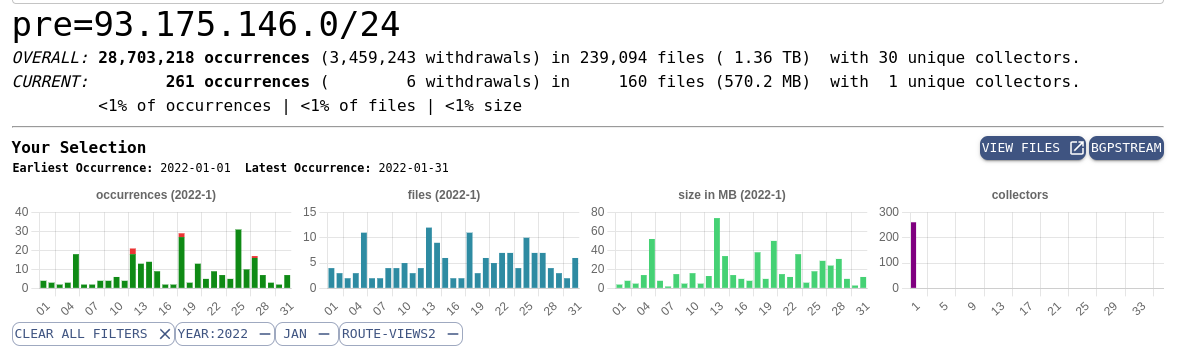

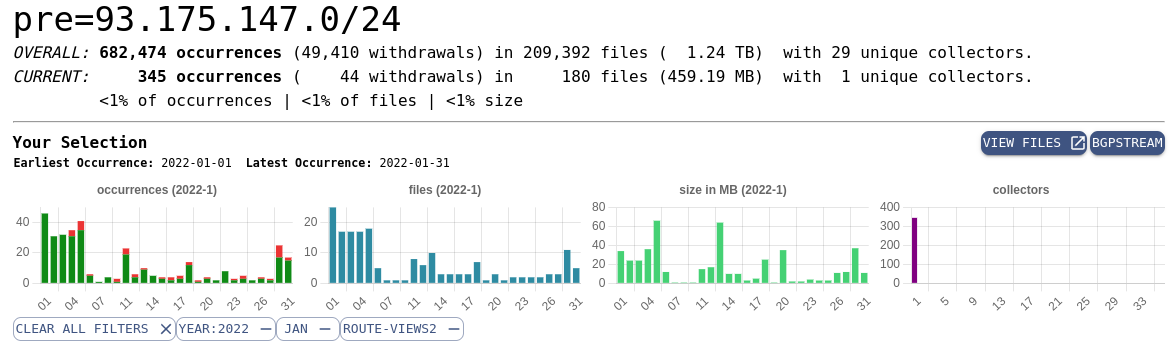

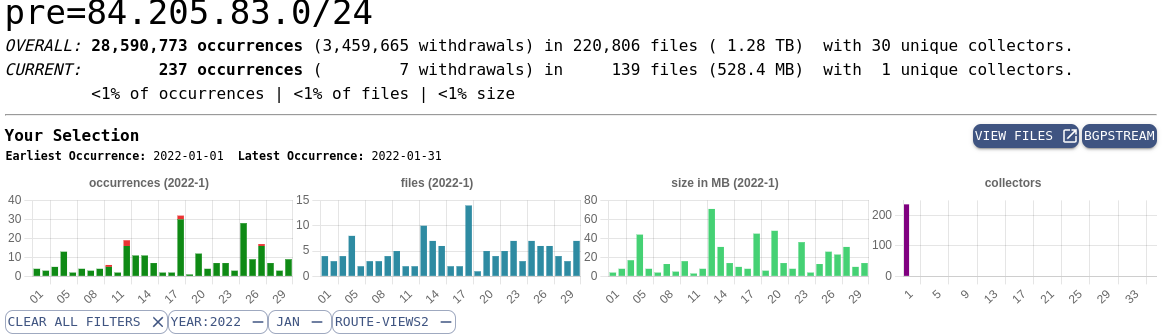

# 5. Data analysis using BGPStream

In [ ]:
import pybgpstream

bgp2go_meta = 'http://nids.caida.org:45000/cgi-bin/urls.sh'
bgp2go_meta += '?pre=93.175.147.0/24&years=2022&months=1&collectors=1'

stream = pybgpstream.BGPStream(data_interface="csvfile")
stream.set_data_interface_option("csvfile", "csv-file", bgp2go_meta)
stream.add_filter('prefix', '93.175.147.0/24')

with open('rov_invalid_jan_2012.txt', 'w') as file:
    for elem in stream:
        file.write(str(elem) + '\n')
        print(elem)

Break down of the BGP update message:

update|A|1641000286.783168|routeviews|route-views2|None|None|8492|85.114.0.217|93.175.147.0/24|85.114.0.217|8492 31133 8218 12654|8492:1104 8492:1602|None|None

1. `update`: Indicates that this is a BGP update message.

2. `A` / `W`: Indicates that this is an announcement message - announced/withdrawn.

3. `1641000286.783168`: The timestamp of the BGP update message, in Unix time format.

4. `routeviews`: The collector that generated the BGP update message.

5. `route-views2`: The router that sent the BGP update message.

6. `None`: The peer that sent the BGP update message. In this case, it is not available.

7. `None`: The peer that received the BGP update message. In this case, it is not available.

8. `8492`: The autonomous system (AS) that originated the BGP update message.

9. `85.114.0.217`: The IP address of the router that originated the BGP update message.

10. `93.175.147.0/24`: The prefix that is being announced in the BGP update message.

11. `85.114.0.217`: The next hop IP address for the announced prefix.

12. `8492 31133 8218 12654`: The AS path for the announced prefix. This indicates the sequence of ASes that the BGP update message has traversed before reaching the collector.

13. `8492:1104 8492:1602`: The BGP communities associated with the announced prefix. In this case, the prefix is tagged with two communities: 8492:1104 and 8492:1602.

14. `None`: The origin of the BGP update message. In this case, it is not available.

15. `None`: The BGP MED (multi-exit discriminator) value for the announced prefix. In this case, it is not available.


# 6. Measuring ROV deployment

`Question 6.1`: How many collector peers forward the ROA-invalid prefix 93.175.147.0/24?

`What is the purpose of finding the number of collector peers forward the ROA-invalid prefix 93.175.147.0/24?`: **2nd anomaly**

By identifying the collector peers that receive updates for this prefix and analyzing whether they forward the prefix to other AS neighbors, we can gain insights into the prevalence of ROA validation and the effectiveness of ROV deployment. Specifically, if a large number of collector peers forward the ROA-invalid prefix, it suggests that ROV deployment is not widespread or effective, and that there may be a significant number of ASes that are not validating ROAs. 

On the other hand, if only a small number of collector peers forward the ROA-invalid prefix, the opposite is true. It suggests that ROV deployment is more widespread and effective, and that there may be fewer ASes that are not validating ROAs.

In [4]:
collector_peers = set()

with open('BGP_data/rov_invalid_jan_2022.txt', 'r') as file:
    for line in file:
        fields = line.strip().split('|')
        # prefix = fields[10]
        origin_as = fields[7]
        as_path = fields[11]

        # Add the Origin AS to the set of collector peers
        collector_peers.add(origin_as)
        # Split the AS path and add each AS to the set of collector peers
        as_path_elements = as_path.split()
        collector_peers.update(as_path_elements)

num_collector_peers = len(collector_peers)

print(f"Collector peers forwarding the ROA-invalid prefix from Jan 2012: {num_collector_peers}")


Collector peers forwarding the ROA-invalid prefix from Jan 2012: 48


`Question 6.2`: How has the number of collector peers forwarding ROA-invalid prefixes changed over the last ten years?

In [ ]:
import pybgpstream

bgp2go_meta = 'http://nids.caida.org:45000/cgi-bin/urls.sh'
# Data of Jan from 2012-2022
bgp2go_meta += '?pre=93.175.147.0/24&years=2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2012&months=1&collectors=1'

stream = pybgpstream.BGPStream(data_interface="csvfile")
stream.set_data_interface_option("csvfile", "csv-file", bgp2go_meta)
stream.add_filter('prefix', '93.175.147.0/24')

with open('BGP_data/rov_invalid_jan_2012_2022.txt', 'w') as file:
    for elem in stream:
        file.write(str(elem) + '\n')
        print(elem)

In [2]:
collector_peers = set()

with open('BGP_data/rov_invalid_jan_2012_2022.txt', 'r') as file:
    for line in file:
        fields = line.strip().split('|')
        # prefix = fields[10]
        origin_as = fields[7]
        as_path = fields[11]

        # Add the Origin AS to the set of collector peers
        collector_peers.add(origin_as)
        # Split the AS path and add each AS to the set of collector peers
        as_path_elements = as_path.split()
        collector_peers.update(as_path_elements)

num_collector_peers = len(collector_peers)

print(f"Collector peers forwarding the ROA-invalid prefix from Jan 2012-2022: {num_collector_peers}")


Collector peers forwarding the ROA-invalid prefix from Jan 2012-2022: 124


## BGP feature extraction

In [ ]:
import pybgpstream
import editdistance

# Initialize the BGPStream
stream = pybgpstream.BGPStream(
    from_time="2018-04-25 08:30:00",
    until_time="2018-04-25 12:00:00",
    record_type="updates",
    collectors=["rrc00"]
)

features = {
    "nb_A" : 0, # Number of announcements
    "nb_W" : 0, # Number of withdrawals:
    "nb_implicit_W" : 0,  
    "nb_dup_A" : 0,
    "nb_dup_W" : 0,
    "nb_A_prefix" : 0, # Number of announced prefixes
    "nb_W_prefix" : 0, # Number of withdrawn prefixes
    "max_A_prefix" : 0, # Max. announcements per prefix
    "avg_A_prefix" : 0, # Avg. announcements per prefix
    "max_A_AS" : 0, # Max. announcements per AS
    "avg_A_AS" : 0, # Avg. announcements per AS
    "nb_orign_change" : 0, 
    "nb_new_A" : 0, # Not stored in RIB
    "nb_new_A_afterW" : 0, 
    "max_path_len" : 0,
    "avg_path_len" : 0,
    "max_editdist" : 0,
    "avg_editdist" : 0,
    "editdist_7" : 0,
    "editdist_8" : 0,
    "editdist_9" : 0,
    "editdist_10" : 0,
    "editdist_11" : 0,
    "editdist_12" : 0,
    "editdist_13" : 0,
    "editdist_14" : 0,
    "editdist_15" : 0,
    "editdist_16" : 0,
    "editdist_17" : 0,
    "nb_tolonger" : 0, 
    "nb_toshorter" : 0,
    "avg_interarrival" : 0,
}

routes = {}
A_per_prefix = {}
W_per_prefix = {}
A_per_AS = {}
path_len = []
inter_time = []
editDist = []

prevTime = 0
index = 0

# Process BGP records
for rec in stream.records():
    for elem in rec:
        update = elem.fields
        
        if "prefix" not in update:
            continue
        
        prefix = update["prefix"]
        peer_asn = update.get("peer_asn", "unknown")
        collector = rec.collector

        if prefix not in routes:
            routes[prefix] = {}
        if collector not in routes[prefix]:
            routes[prefix][collector] = {}

        if elem.type == 'A':
            features["nb_A"] += 1

            Uas_path = update['as-path']
            path_len.append(len(Uas_path.split(" ")))

            if prefix not in A_per_prefix:
                A_per_prefix[prefix] = 0

            A_per_prefix[prefix] += 1

            origin = Uas_path.split(" ")[-1]
            if origin not in A_per_AS:
                A_per_AS[origin] = 0

            A_per_AS[origin] += 1

            if peer_asn not in routes[prefix][collector] or routes[prefix][collector][peer_asn] is None:
                features["nb_new_A"] += 1
            elif routes[prefix][collector][peer_asn] == "w" + str(index):
                features["nb_new_A_afterW"] += 1
            elif routes[prefix][collector][peer_asn][0] == "w":
                features["nb_new_A"] += 1
            elif routes[prefix][collector][peer_asn] == Uas_path:
                features["nb_dup_A"] += 1
            else:
                features["nb_implicit_W"] += 1

                ASlist_prev = routes[prefix][collector][peer_asn].split(" ")
                ASlist_new = Uas_path.split(" ")

                if ASlist_prev[-1] != ASlist_new[-1]:
                    features["nb_orign_change"] += 1

                if len(ASlist_new) > len(ASlist_prev):
                    features["nb_tolonger"] += 1
                else:
                    features["nb_toshorter"] += 1

                edist = editdistance.eval(ASlist_prev, ASlist_new)
                editDist.append(edist)
                if 7 <= edist <= 17:
                    features["editdist_" + str(edist)] += 1

            routes[prefix][collector][peer_asn] = Uas_path

        elif elem.type == 'W':
            features["nb_W"] += 1

            if prefix not in W_per_prefix:
                W_per_prefix[prefix] = 0

            W_per_prefix[prefix] += 1

            if peer_asn in routes[prefix][collector] and routes[prefix][collector][peer_asn] == "w" + str(index):
                features["nb_dup_W"] += 1

            routes[prefix][collector][peer_asn] = "w" + str(index)

        if prevTime != 0:
            iTime = int(elem.time) - prevTime
            if iTime > 0:
                inter_time.append(iTime)

        prevTime = int(elem.time)
        index += 1

# Final aggregation
features["nb_A_prefix"] = len(A_per_prefix)
features["nb_W_prefix"] = len(W_per_prefix)
A_per_prefix_values = A_per_prefix.values()
if len(A_per_prefix_values) > 1:
    features["max_A_prefix"] = max(A_per_prefix_values)
    features["avg_A_prefix"] = round(sum(A_per_prefix_values) / len(A_per_prefix_values))

A_per_AS_values = A_per_AS.values()
if len(A_per_AS_values) > 1:
    features["max_A_AS"] = max(A_per_AS_values)
    features["avg_A_AS"] = round(sum(A_per_AS_values) / len(A_per_AS_values))

if len(path_len) > 1:
    features["max_path_len"] = max(path_len)
    features["avg_path_len"] = round(sum(path_len) / len(path_len))

if len(inter_time) > 1:
    features["avg_interarrival"] = round(sum(inter_time) * 1000 / len(inter_time))

if len(editDist) > 1:
    features["max_editdist"] = max(editDist)
    features["avg_editdist"] = round(sum(editDist) / len(editDist))

print(features)


In [13]:
import pybgpstream
import editdistance
import pandas as pd
from datetime import datetime, timedelta

# Initialize the BGPStream
stream = pybgpstream.BGPStream(
    from_time="2018-04-25 08:30:00",
    until_time="2018-04-25 12:00:00",
    record_type="updates",
    collectors=["rrc00"]
)

# Function to initialize the feature dictionary
def init_features():
    return {
        "timestamp": None,
        "nb_A" : 0, # Number of announcements
        "nb_W" : 0, # Number of withdrawals:
        "nb_implicit_W" : 0,  
        "nb_dup_A" : 0,
        "nb_dup_W" : 0,
        "nb_A_prefix" : 0, # Number of announced prefixes
        "nb_W_prefix" : 0, # Number of withdrawn prefixes
        "max_A_prefix" : 0, # Max. announcements per prefix
        "avg_A_prefix" : 0, # Avg. announcements per prefix
        "max_A_AS" : 0, # Max. announcements per AS
        "avg_A_AS" : 0, # Avg. announcements per AS
        "nb_orign_change" : 0, 
        "nb_new_A" : 0, # Not stored in RIB
        "nb_new_A_afterW" : 0, 
        "max_path_len" : 0,
        "avg_path_len" : 0,
        "max_editdist" : 0,
        "avg_editdist" : 0,
        "editdist_7" : 0,
        "editdist_8" : 0,
        "editdist_9" : 0,
        "editdist_10" : 0,
        "editdist_11" : 0,
        "editdist_12" : 0,
        "editdist_13" : 0,
        "editdist_14" : 0,
        "editdist_15" : 0,
        "editdist_16" : 0,
        "editdist_17" : 0,
        "nb_tolonger" : 0, 
        "nb_toshorter" : 0,
        "avg_interarrival" : 0,
    }

# Initialize DataFrame to store the aggregated features
columns = list(init_features().keys())
df_features = pd.DataFrame(columns=columns)

# Initialize variables
routes = {}
A_per_prefix = {}
W_per_prefix = {}
A_per_AS = {}
path_len = []
inter_time = []
editDist = []

prevTime = 0
index = 0

# Initialize feature set for the first 5-minute window
current_window_start = datetime.strptime("2018-04-25 08:30:00", "%Y-%m-%d %H:%M:%S")
current_features = init_features()
current_features["timestamp"] = current_window_start

# Process BGP records
for rec in stream.records():
    for elem in rec:
        update = elem.fields
        elem_time = datetime.utcfromtimestamp(elem.time)
        
        if elem_time >= current_window_start + timedelta(minutes=5):
            # Final aggregation for the current window
            current_features["nb_A_prefix"] = len(A_per_prefix)
            current_features["nb_W_prefix"] = len(W_per_prefix)
            A_per_prefix_values = A_per_prefix.values()
            if len(A_per_prefix_values) > 1:
                current_features["max_A_prefix"] = max(A_per_prefix_values)
                current_features["avg_A_prefix"] = round(sum(A_per_prefix_values) / len(A_per_prefix_values))

            A_per_AS_values = A_per_AS.values()
            if len(A_per_AS_values) > 1:
                current_features["max_A_AS"] = max(A_per_AS_values)
                current_features["avg_A_AS"] = round(sum(A_per_AS_values) / len(A_per_AS_values))

            if len(path_len) > 1:
                current_features["max_path_len"] = max(path_len)
                current_features["avg_path_len"] = round(sum(path_len) / len(path_len))

            if len(inter_time) > 1:
                current_features["avg_interarrival"] = round(sum(inter_time) * 1000 / len(inter_time))

            if len(editDist) > 1:
                current_features["max_editdist"] = max(editDist)
                current_features["avg_editdist"] = round(sum(editDist) / len(editDist))
            
            # Append the features to the DataFrame
            df_features = pd.concat([df_features, pd.DataFrame([current_features])], ignore_index=True)

            # Reset variables for the new window
            current_window_start += timedelta(minutes=5)
            current_features = init_features()
            current_features["timestamp"] = current_window_start
            routes = {}
            A_per_prefix = {}
            W_per_prefix = {}
            A_per_AS = {}
            path_len = []
            inter_time = []
            editDist = []
            prevTime = 0
            index = 0

        if "prefix" not in update:
            continue
        
        prefix = update["prefix"]
        peer_asn = update.get("peer_asn", "unknown")
        collector = rec.collector

        if prefix not in routes:
            routes[prefix] = {}
        if collector not in routes[prefix]:
            routes[prefix][collector] = {}

        if elem.type == 'A':
            current_features["nb_A"] += 1

            Uas_path = update['as-path']
            path_len.append(len(Uas_path.split(" ")))

            if prefix not in A_per_prefix:
                A_per_prefix[prefix] = 0

            A_per_prefix[prefix] += 1

            origin = Uas_path.split(" ")[-1]
            if origin not in A_per_AS:
                A_per_AS[origin] = 0

            A_per_AS[origin] += 1

            if peer_asn not in routes[prefix][collector] or routes[prefix][collector][peer_asn] is None:
                current_features["nb_new_A"] += 1
            elif routes[prefix][collector][peer_asn] == "w" + str(index):
                current_features["nb_new_A_afterW"] += 1
            elif routes[prefix][collector][peer_asn][0] == "w":
                current_features["nb_new_A"] += 1
            elif routes[prefix][collector][peer_asn] == Uas_path:
                current_features["nb_dup_A"] += 1
            else:
                current_features["nb_implicit_W"] += 1

                ASlist_prev = routes[prefix][collector][peer_asn].split(" ")
                ASlist_new = Uas_path.split(" ")

                if ASlist_prev[-1] != ASlist_new[-1]:
                    current_features["nb_orign_change"] += 1

                if len(ASlist_new) > len(ASlist_prev):
                    current_features["nb_tolonger"] += 1
                else:
                    current_features["nb_toshorter"] += 1

                edist = editdistance.eval(ASlist_prev, ASlist_new)
                editDist.append(edist)
                if 7 <= edist <= 17:
                    current_features["editdist_" + str(edist)] += 1

            routes[prefix][collector][peer_asn] = Uas_path

        elif elem.type == 'W':
            current_features["nb_W"] += 1

            if prefix not in W_per_prefix:
                W_per_prefix[prefix] = 0

            W_per_prefix[prefix] += 1

            if peer_asn in routes[prefix][collector] and routes[prefix][collector][peer_asn] == "w" + str(index):
                current_features["nb_dup_W"] += 1

            routes[prefix][collector][peer_asn] = "w" + str(index)

        if prevTime != 0:
            iTime = int(elem.time) - prevTime
            if iTime > 0:
                inter_time.append(iTime)

        prevTime = int(elem.time)
        index += 1

# Final aggregation for the last window
current_features["nb_A_prefix"] = len(A_per_prefix)
current_features["nb_W_prefix"] = len(W_per_prefix)
A_per_prefix_values = A_per_prefix.values()
if len(A_per_prefix_values) > 1:
    current_features["max_A_prefix"] = max(A_per_prefix_values)
    current_features["avg_A_prefix"] = round(sum(A_per_prefix_values) / len(A_per_prefix_values))

A_per_AS_values = A_per_AS.values()
if len(A_per_AS_values) > 1:
    current_features["max_A_AS"] = max(A_per_AS_values)
    current_features["avg_A_AS"] = round(sum(A_per_AS_values) / len(A_per_AS_values))

if len(path_len) > 1:
    current_features["max_path_len"] = max(path_len)
    current_features["avg_path_len"] = round(sum(path_len) / len(path_len))

if len(inter_time) > 1:
    current_features["avg_interarrival"] = round(sum(inter_time) * 1000 / len(inter_time))

if len(editDist) > 1:
    current_features["max_editdist"] = max(editDist)
    current_features["avg_editdist"] = round(sum(editDist) / len(editDist))

df_features = pd.concat([df_features, pd.DataFrame([current_features])], ignore_index=True)

# Display the DataFrame to verify
print(df_features)

# Save the DataFrame to a CSV file if needed
# df_features.to_csv("bgp_features_5min_windows.csv", index=False)


             timestamp    nb_A   nb_W nb_implicit_W nb_dup_A nb_dup_W  \
0  2018-04-25 08:30:00   43811   6025         34734     2225        0   
1  2018-04-25 08:35:00   66066   3439         53113     2652        0   
2  2018-04-25 08:40:00   58332   4580         47318     2668        0   
3  2018-04-25 08:45:00   73030   5764         61742     3975        0   
4  2018-04-25 08:50:00   69426   5980         58196     3525        0   
5  2018-04-25 08:55:00   79019  10435         60924     4816        0   
6  2018-04-25 09:00:00   33041   2746         26241     1201        0   
7  2018-04-25 09:05:00   47267   4573         38995     1865        0   
8  2018-04-25 09:10:00   53088   2580         43997     2644        0   
9  2018-04-25 09:15:00   42773   4000         36589     1739        0   
10 2018-04-25 09:20:00   63809   3534         56078     2046        0   
11 2018-04-25 09:25:00   30001   2774         24769     1334        0   
12 2018-04-25 09:30:00   22152   2344         18284

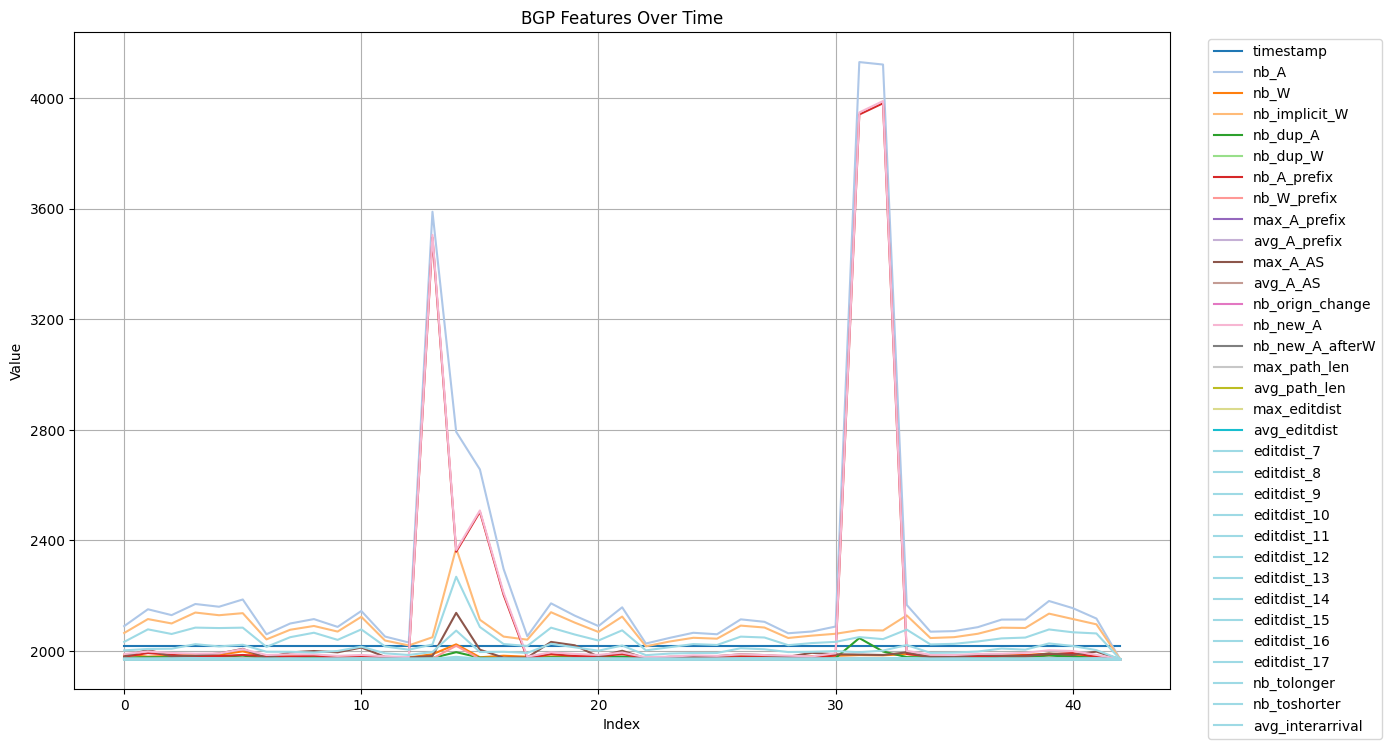

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# Determine the number of columns
num_cols = len(df_features.columns)

# Generate a color map with as many unique colors as there are columns
color_map = plt.colormaps.get_cmap('tab20')  # 'tab20' is a good choice for up to 20 unique colors
colors = color_map(range(num_cols))

fig, ax = plt.subplots(figsize=(14, 8))
for i, col in enumerate(df_features.columns):
    ax.plot(df_features.index, df_features[col], label=col, color=colors[i % len(colors)])

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Add titles and labels
ax.set_title('BGP Features Over Time')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()